In [1]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from collections import deque
import random

# Create the environment
env = gym.make("MountainCar-v0")

# Neural network for Q-learning
def create_model(input_shape, action_space):
    model = Sequential([
        Dense(24, input_shape=input_shape, activation='relu'),
        Dense(24, activation='relu'),
        Dense(action_space, activation='linear')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return model

# Replay buffer
class ReplayBuffer:
    def __init__(self, size):
        self.buffer = deque(maxlen=size)
    
    def store(self, experience):
        self.buffer.append(experience)
    
    def sample(self, batch_size):
        indices = random.sample(range(len(self.buffer)), batch_size)
        return [self.buffer[idx] for idx in indices]
    
    def __len__(self):
        return len(self.buffer)

# DQN with TensorFlow
def dqn_tensorflow():
    action_space = env.action_space.n
    state_space = env.observation_space.shape[0]
    model = create_model((state_space,), action_space)
    target_model = create_model((state_space,), action_space)
    target_model.set_weights(model.get_weights())
    
    buffer = ReplayBuffer(10000)
    epsilon = 1.0
    epsilon_min = 0.01
    epsilon_decay = 0.995
    gamma = 0.99
    batch_size = 64

    for episode in range(500):
        state = env.reset()
        state = np.reshape(state, (1, state_space))
        total_reward = 0
        
        for step in range(200):
            # Choose action (epsilon-greedy)
            if np.random.rand() <= epsilon:
                action = env.action_space.sample()
            else:
                q_values = model.predict(state, verbose=0)
                action = np.argmax(q_values[0])
            
            # Take action
            next_state, reward, done, _ = env.step(action)
            next_state = np.reshape(next_state, (1, state_space))
            buffer.store((state, action, reward, next_state, done))
            state = next_state
            total_reward += reward
            
            if done:
                print(f"Episode {episode+1}, Total Reward: {total_reward}, Epsilon: {epsilon:.2f}")
                break
            
            # Train the model if buffer is sufficient
            if len(buffer) > batch_size:
                batch = buffer.sample(batch_size)
                states, actions, rewards, next_states, dones = zip(*batch)
                states = np.vstack(states)
                next_states = np.vstack(next_states)
                targets = model.predict(states, verbose=0)
                q_next = target_model.predict(next_states, verbose=0)
                
                for i in range(batch_size):
                    targets[i, actions[i]] = rewards[i] + (1 - dones[i]) * gamma * np.amax(q_next[i])
                
                model.fit(states, targets, epochs=1, verbose=0)
            
            # Update target network
            if step % 10 == 0:
                target_model.set_weights(model.get_weights())
        
        epsilon = max(epsilon_min, epsilon * epsilon_decay)

    env.close()
    return model

# Run TensorFlow-based training
dqn_tensorflow()


2024-12-16 23:48:36.167356: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-16 23:48:36.201639: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734373116.253561  181208 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734373116.265583  181208 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-16 23:48:36.304596: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

KeyboardInterrupt: 

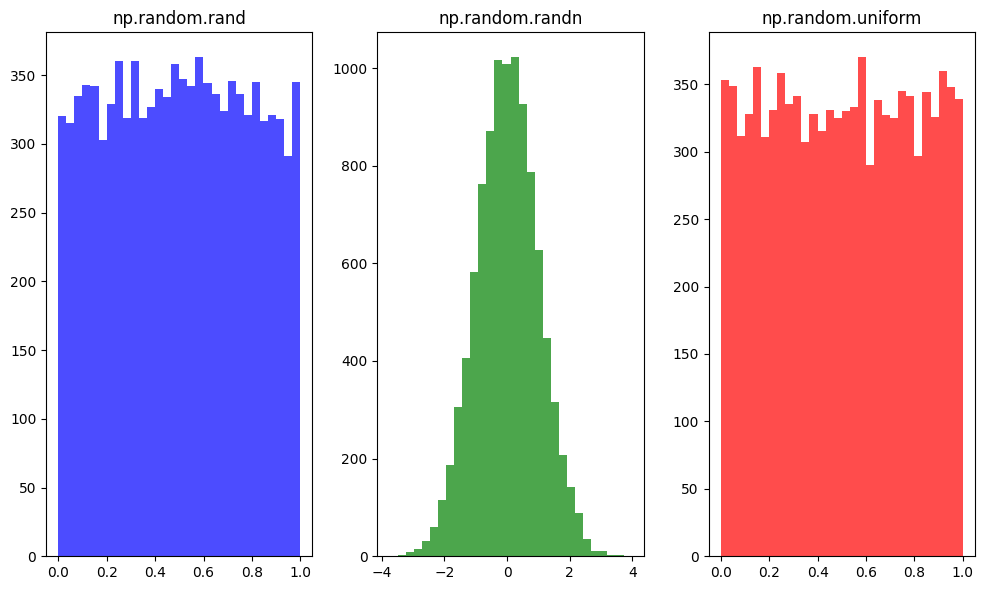

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 samples for each distribution
rand_samples = np.random.rand(10000)
randn_samples = np.random.randn(10000)
uniform_samples = np.random.uniform(0, 1, 10000)

# Plot the distributions
plt.figure(figsize=(10, 6))

# Plot np.random.rand
plt.subplot(1, 3, 1)
plt.hist(rand_samples, bins=30, color='blue', alpha=0.7)
plt.title('np.random.rand')

# Plot np.random.randn
plt.subplot(1, 3, 2)
plt.hist(randn_samples, bins=30, color='green', alpha=0.7)
plt.title('np.random.randn')

# Plot np.random.uniform
plt.subplot(1, 3, 3)
plt.hist(uniform_samples, bins=30, color='red', alpha=0.7)
plt.title('np.random.uniform')

# Show the plots
plt.tight_layout()
plt.show()
